# Objetivos de la lección de hoy:

### Aprender transform() en pandas:

* Para aplicar funciones y conservar la forma original del DataFrame..

*  ¿Cómo se compara la calificación de un libro con el promedio de su género?

* Crear columnas nuevas a partir de estadísticas por grupo.

* Visualizar comparaciones por grupo con matplotlib y seaborn.



## 📘 Dataset de libros
### Vamos a trabajar con un pequeño dataset ficticio que contiene libros de diferentes géneros, autores y países, con datos como:

* `Titulo`: nombre del libro

* `Autor`: nombre del autor

* `Genero`: fantasía, ciencia ficción, drama, etc.

* `Pais`: país de origen del autor

* `Calificacion`: puntuación del libro (1 a 10)

* `Paginas`: número de páginas

* `Publicado`: año de publicación

* `Disponible`: si está disponible actualmente (True/False)



In [1]:
# Importamos Pandas, creamos un diccionario y lo convertimos a DataFrame

import pandas as pd

datos = {
    "titulo": [
        "El castillo ambulante", "1984", "Cien años de soledad", "Fundación",
        "Harry Potter", "Los juegos del hambre", "Crónica de una muerte anunciada",
        "Neuromante", "El nombre del viento", "Orgullo y prejuicio"
    ],
    "autor": [
        "Diana Wynne Jones", "George Orwell", "Gabriel García Márquez", "Isaac Asimov",
        "J.K. Rowling", "Suzanne Collins", "Gabriel García Márquez", "William Gibson",
        "Patrick Rothfuss", "Jane Austen"
    ],
    "genero": [
        "Fantasía", "Distopía", "Realismo mágico", "Ciencia ficción",
        "Fantasía", "Distopía", "Realismo mágico", "Ciencia ficción",
        "Fantasía", "Romance"
    ],
    "pais": [
        "Reino Unido", "Reino Unido", "Colombia", "Rusia",
        "Reino Unido", "EE.UU.", "Colombia", "EE.UU.",
        "EE.UU.", "Reino Unido"
    ],
    "calificacion": [8.9, 9.5, 9.3, 8.7, 9.2, 8.4, 8.9, 8.1, 9.1, 8.5],
    "paginas": [336, 328, 417, 255, 500, 374, 120, 271, 662, 279],
    "publicado": [1970, 1949, 1967, 1951, 1997, 2008, 1981, 1984, 2007, 1813],
    "disponible": [True, True, False, True, True, True, False, True, True, True]
}

df = pd.DataFrame(datos)
df


,titulo,autor,genero,pais,calificacion,paginas,publicado,disponible
0,El castillo ambulante,Diana Wynne Jones,Fantasía,Reino Unido,8.9,336,1970,True
1,1984,George Orwell,Distopía,Reino Unido,9.5,328,1949,True
2,Cien años de soledad,Gabriel García Márquez,Realismo mágico,Colombia,9.3,417,1967,False
3,Fundación,Isaac Asimov,Ciencia ficción,Rusia,8.7,255,1951,True
4,Harry Potter,J.K. Rowling,Fantasía,Reino Unido,9.2,500,1997,True
5,Los juegos del hambre,Suzanne Collins,Distopía,EE.UU.,8.4,374,2008,True
6,Crónica de una muerte anunciada,Gabriel García Márquez,Realismo mágico,Colombia,8.9,120,1981,False
7,Neuromante,William Gibson,Ciencia ficción,EE.UU.,8.1,271,1984,True
8,El nombre del viento,Patrick Rothfuss,Fantasía,EE.UU.,9.1,662,2007,True
9,Orgullo y prejuicio,Jane Austen,Romance,Reino Unido,8.5,279,1813,True


## 🌀 ¿Qué es `.transform()` en pandas?

#### `.transform()` te permite aplicar una función a cada grupo, pero sin perder la forma original del DataFrame.

#### 🔍 Mientras `.agg()` reduce cada grupo a un valor (por ejemplo, el promedio),
#### `.transform()` mantiene el número de filas original, devolviendo una serie alineada con el DataFrame.

#### Perfecto si queremos comparar cada fila con su grupo sin perder el contexto

### 🎨 Ejemplo 1 — Calificación media por género
#### Queremos saber cómo se compara cada libro con la calificación media de su género.
#### Para eso, primero creamos una nueva columna con la media por género:

In [2]:
# Añadimos la media de calificación por género como nueva columna

df["calificacion_media"] = df.groupby("genero")["calificacion"].transform("mean") # llamo a la tabla calificacion_media que es donde voy a guardar los datos y agrupo por genero segun la media de la calificacion
df[["titulo", "genero", "calificacion", "calificacion_media"]] # las colunmas que quiero que muestre

,titulo,genero,calificacion,calificacion_media
0,El castillo ambulante,Fantasía,8.9,9.066667
1,1984,Distopía,9.5,8.950000
2,Cien años de soledad,Realismo mágico,9.3,9.100000
3,Fundación,Ciencia ficción,8.7,8.400000
4,Harry Potter,Fantasía,9.2,9.066667
5,Los juegos del hambre,Distopía,8.4,8.950000
6,Crónica de una muerte anunciada,Realismo mágico,8.9,9.100000
7,Neuromante,Ciencia ficción,8.1,8.400000
8,El nombre del viento,Fantasía,9.1,9.066667
9,Orgullo y prejuicio,Romance,8.5,8.500000


### ¿Qué está pasando en el bloque de codigo anterior?
* Agrupamos por "genero"

* Calculamos el promedio de "calificacion" por grupo

* transform("mean") asigna ese promedio a todas las filas del grupo

* Lo guardamos en una nueva columna: "calif_media_genero"

* Así puedes comparar fácilmente cada calificación con el promedio de su grupo.

### 🧮 Ejemplo 2 — Comparar con promedio


####¿Qué tan por encima o por debajo está cada libro del promedio de su género?

*  Crea una nueva columna llamada "diferencia_con_genero" que calcule la diferencia entre la calificación del libro y la media de su género.

### Pista:

#### Es simplemente restar dos columnas: "calificacion" y "calif_media_genero".

In [3]:
# ¿Está por encima de la media?

df["diferencia_con_genero"] = df["calificacion"] - df["calificacion_media"]
df[["titulo", "genero", "calificacion", "diferencia_con_genero"]]

,titulo,genero,calificacion,diferencia_con_genero
0,El castillo ambulante,Fantasía,8.9,-0.166667
1,1984,Distopía,9.5,0.550000
2,Cien años de soledad,Realismo mágico,9.3,0.200000
3,Fundación,Ciencia ficción,8.7,0.300000
4,Harry Potter,Fantasía,9.2,0.133333
5,Los juegos del hambre,Distopía,8.4,-0.550000
6,Crónica de una muerte anunciada,Realismo mágico,8.9,-0.200000
7,Neuromante,Ciencia ficción,8.1,-0.300000
8,El nombre del viento,Fantasía,9.1,0.033333
9,Orgullo y prejuicio,Romance,8.5,0.000000


#### Mientras más cercano a 0, más semejante con la calificacion con su genero, si es negativo esta por debajo y mientras más positivo, mayor será su calificación en cuanto a su género

### 📏 Ejemplo 3 — Crear columna con longitud relativa

#### Queremos ver si un libro tiene más páginas que otros de su género.
### Queremos calcular para cada libro:
### 📚 cuántas páginas tiene en relación con el promedio de páginas de su autor.

#### Esto puede ayudarnos a saber si un autor suele escribir libros muy largos, y si uno en particular es una excepción.

#### 🪄 Paso 1 — Crear la columna del promedio de páginas por autor

In [4]:

df["paginas_media_autor"] = df.groupby("autor")["paginas"].transform("mean")


#### 🪄 Paso 2 — Crear una columna que muestre cuánto más (o menos) largo es el libro respecto al promedio

In [5]:

df["diferencia_paginas"] = df["paginas"] - df["paginas_media_autor"]


#### 🪄 Paso 3 — Mostrar columnas relevantes para analizar

Resultado esperado
Verás libros ordenados por cuánto más largos son que la media del autor.
También puedes detectar libros más cortos si tienen diferencia negativa.

In [6]:

df[["titulo", "autor", "paginas", "paginas_media_autor",
    "diferencia_paginas"]].sort_values("diferencia_paginas", ascending=False)


,titulo,autor,paginas,paginas_media_autor,diferencia_paginas
2,Cien años de soledad,Gabriel García Márquez,417,268.5,148.5
0,El castillo ambulante,Diana Wynne Jones,336,336.0,0.0
1,1984,George Orwell,328,328.0,0.0
3,Fundación,Isaac Asimov,255,255.0,0.0
4,Harry Potter,J.K. Rowling,500,500.0,0.0
5,Los juegos del hambre,Suzanne Collins,374,374.0,0.0
7,Neuromante,William Gibson,271,271.0,0.0
8,El nombre del viento,Patrick Rothfuss,662,662.0,0.0
9,Orgullo y prejuicio,Jane Austen,279,279.0,0.0
6,Crónica de una muerte anunciada,Gabriel García Márquez,120,268.5,-148.5


#### Observamos que Gabriel García Marquez su libro: 'Cien años de soledad' tiene un pomedia de 148.5 paginas mas que las que normalmente escribe, mientras que su otro libro registrado en el dataset: 'Crónica de una muerte anunciada' tiene justo 148.5 páginas menos que las que normalmnte escribe.

#### a los otros escritores les sale 0 la diferencia de paginas promedio que escriben con respecto al libro registrado en el dataset, muy posiblemente se deba a que solo hay un libro de ellos en el dataset y por tanto es engañosa y poco útil en ellos esta medida.

### ¿Qué tan bien califica cada autor comparado con sus libros?
#### Queremos calcular:

* 🧠 El promedio de calificación por autor

* 📘 Para cada libro, la diferencia entre su calificación y ese promedio



In [10]:
# agrupa por autor, calula el promedio de la clasificacion y asigna el promadio a cada libro de ese autor

df["calificacion_media"] = df.groupby("autor")["calificacion"].transform("mean")

df['calificacion_media']


,calificacion_media
0,8.9
1,9.5
2,9.1
3,8.7
4,9.2
5,8.4
6,9.1
7,8.1
8,9.1
9,8.5


#### la anterior tabla presenta la calificación media de los libros

In [11]:
# diferencia entre la calificacion y la calificacion media

df["diferencia"] = df["calificacion"] - df["calificacion_media"]

df["diferencia"]

,diferencia
0,0.0
1,0.0
2,0.2
3,0.0
4,0.0
5,0.0
6,-0.2
7,0.0
8,0.0
9,0.0


#### la anterior tabla nos muestra la diferencia entre la calificacion y la calificacion media de los libros

 ### ¿Cómo lo interpretamos?
* Si el valor es `positivo`, el libro está por encima del promedio de su autor.

* Si es `negativo`, está por debajo.

* Si es ` 0`, está justo en la media.

In [12]:
# lo siguiente es para visualizar bien el resultado
df[["titulo", "autor", "calificacion", "calificacion_media", "diferencia"]].head(10)

,titulo,autor,calificacion,calificacion_media,diferencia
0,El castillo ambulante,Diana Wynne Jones,8.9,8.9,0.0
1,1984,George Orwell,9.5,9.5,0.0
2,Cien años de soledad,Gabriel García Márquez,9.3,9.1,0.2
3,Fundación,Isaac Asimov,8.7,8.7,0.0
4,Harry Potter,J.K. Rowling,9.2,9.2,0.0
5,Los juegos del hambre,Suzanne Collins,8.4,8.4,0.0
6,Crónica de una muerte anunciada,Gabriel García Márquez,8.9,9.1,-0.2
7,Neuromante,William Gibson,8.1,8.1,0.0
8,El nombre del viento,Patrick Rothfuss,9.1,9.1,0.0
9,Orgullo y prejuicio,Jane Austen,8.5,8.5,0.0


#### ninguno tiene diferencias ( por lo que comentamos antes de que solo disponen de un libro registrado) pero Garcia Marquez al tener 2 libros, podemos ver que el peor valorado es 'Crónica de una muerte anunciada' con respecto a 'Cien años de soledad'

## Transformaciones con `GroupBy` + `transform()`

### 🔧 ¿Qué es `.transform()` en pandas?

#### Mientras `.agg()` reduce los grupos (devuelve un valor por grupo),

#### `.transform()` devuelve un valor para cada fila, replicando el resultado del grupo al que pertenece.

In [13]:
# Esto no devueve una tabla reducida, sino una nueva columna del mismo largo que df, con el promedio del autor repetido en cada una de las filas.

df1 = df["media_autor"] = df.groupby("autor")["calificacion"].transform("mean")

df1


,calificacion
0,8.9
1,9.5
2,9.1
3,8.7
4,9.2
5,8.4
6,9.1
7,8.1
8,9.1
9,8.5


#### Media de calificación por autor, pero al no aparecer los autores no se puede ver bien que autores son los mejor valorados.

### 📌 ¿Cuándo usar `transform()` y no `agg()`?
#### quieres
* Una tabla resumida por grupo
  * usa `.agg()`

#### quieres
* Hacer operaciones fila por fila, usando el grupo al que pertenece
  * usa `.transform()`

## ¿Qué tan atípico es un libro dentro de su género?
### Es decir Calcular el desvío estándar por género, y ver para cada libro cuán lejos está del promedio.

### Queremos calcular:

* La media de calificación por género

* El desvío estándar por género

* Para cada libro, cuán lejos está de la media, en número de desviaciones

In [ ]:
# Paso 1: media del genero

# Asigna la media de calificación de cada género a todos los libros que pertenecen a él.

df["media_genero"] = df.groupby("genero")["calificacion"].transform("mean")


In [ ]:
# Acontinuacion se calcula calculado cuánta variación hay en las calificaciones dentro de cada género.

df["desviacion_genero"] = df.groupby("genero")["calificacion"].transform("std")


In [ ]:
# ¿Cuántas desviaciones estándar se aleja su calificación del promedio de su género?

# Eso se llama z-score (fundamentos que se usan incluso en ciencia y estadística avanzada).

df["z_genero"] = (df["calificacion"] - df["media_genero"]) / df["desviacion_genero"]

df["z_genero"]


,z_genero
0,-1.091089
1,0.707107
2,0.707107
3,0.707107
4,0.872872
5,-0.707107
6,-0.707107
7,-0.707107
8,0.218218
9,NaN


### 📊 Interpretación de tu columna z_genero
### La columna z_genero que calculé representa el `z-score`, o `“número de desviaciones estándar”` que la calificación de un libro está por encima o por debajo del promedio de su género.

### Cómo interpretar z_genero

*  `≈ 0`	El libro tiene una calificación cercana al promedio de su género

*  `( > 0)`	Está por encima del promedio del género

*  `< 0`	Está por debajo del promedio del género

* ` ≥ 2`	Está muy por encima del promedio (posiblemente atípico positivo)

* `≤ -2`	Está muy por debajo del promedio (posiblemente atípico negativo)

* ` NaN`	Ocurre cuando la desviación estándar del grupo es 0 (todos los libros tienen misma calificación en ese género)


In [ ]:
# Puedes ordenar para ver los libros más atípicos dentro de su género

df.sort_values("z_genero", ascending=False)[["titulo", "genero", "calificacion", "z_genero"]].head(10)


,titulo,genero,calificacion,z_genero
4,Harry Potter,Fantasía,9.2,0.872872
3,Fundación,Ciencia ficción,8.7,0.707107
1,1984,Distopía,9.5,0.707107
2,Cien años de soledad,Realismo mágico,9.3,0.707107
8,El nombre del viento,Fantasía,9.1,0.218218
7,Neuromante,Ciencia ficción,8.1,-0.707107
5,Los juegos del hambre,Distopía,8.4,-0.707107
6,Crónica de una muerte anunciada,Realismo mágico,8.9,-0.707107
0,El castillo ambulante,Fantasía,8.9,-1.091089
9,Orgullo y prejuicio,Romance,8.5,NaN


### 📊 Resultados de z_genero:
|Índice	|z_genero	|¿Qué significa?|
|-------|---------|---------------|
|0	|-1.091	|Está por debajo del promedio de su género. No es extremo, pero sí algo más bajo que lo común.
|1–3	|0.707	|Están por encima del promedio de su género, pero dentro de lo normal.
|4	|0.873	|También está por encima, un poco más destacado.
|5–7	|-0.707	|Están por debajo del promedio, pero sin ser preocupante.
|8	|0.218	|Muy cercano al promedio.
|9	|NaN	|Esto pasa cuando la desviación estándar es 0 en ese grupo (es decir, todos los libros de ese género tienen la misma calificación).

###  ¿Cómo usar esta info?
#### Se pueden detectar libros notables dentro de su género (muy buenos o muy malos) si tienen z_genero > 2 o < -2.

#### Si se quiere destacar libros “más valorados dentro de su género”, puedes filtrar así:

In [ ]:
df[df["z_genero"] > 0][["titulo", "genero", "calificacion", "z_genero"]]


,titulo,genero,calificacion,z_genero
1,1984,Distopía,9.5,0.707107
2,Cien años de soledad,Realismo mágico,9.3,0.707107
3,Fundación,Ciencia ficción,8.7,0.707107
4,Harry Potter,Fantasía,9.2,0.872872
8,El nombre del viento,Fantasía,9.1,0.218218


## 🌀 Parte 3: Transformaciones creativas por grupo con `.transform()` y `.apply()`
### 🌟 ¿Por qué `.transform()` y `.apply()` son tan poderosas?
#### Porque te permiten generar nuevas columnas fila a fila pero usando el contexto del grupo.
#### Es decir, puedes hacer cosas como:

* Calcular rankings dentro del grupo

* Detectar valores atípicos por grupo

* Normalizar valores solo dentro del grupo

* Etiquetar los "mejores" de cada categoría

### 🧪 EJERCICIO — ¿Qué tan lejos está cada libro del más valorado de su género?
### Queremos una nueva columna llamada "diferencia_con_maximo_genero" que diga cuántos puntos le faltan a cada libro para alcanzar al libro con la calificación más alta de su género.

In [ ]:
df["calificacion_max_genero"] = df.groupby("genero")["calificacion"].transform("max")

df["diferencia_con_maximo_genero"] = df["calificacion_max_genero"] - df["calificacion"]

In [ ]:
# luego asi se muestra

df[["titulo", "genero", "calificacion", "calificacion_max_genero", "diferencia_con_maximo_genero"]]

,titulo,genero,calificacion,calificacion_max_genero,diferencia_con_maximo_genero
0,El castillo ambulante,Fantasía,8.9,9.2,0.3
1,1984,Distopía,9.5,9.5,0.0
2,Cien años de soledad,Realismo mágico,9.3,9.3,0.0
3,Fundación,Ciencia ficción,8.7,8.7,0.0
4,Harry Potter,Fantasía,9.2,9.2,0.0
5,Los juegos del hambre,Distopía,8.4,9.5,1.1
6,Crónica de una muerte anunciada,Realismo mágico,8.9,9.3,0.4
7,Neuromante,Ciencia ficción,8.1,8.7,0.6
8,El nombre del viento,Fantasía,9.1,9.2,0.1
9,Orgullo y prejuicio,Romance,8.5,8.5,0.0


### 🔮 Parte 4: Ranking dentro de cada grupo
### Una tarea muy común es calcular el ranking de un valor dentro de su grupo.

#### Por ejemplo: ¿Qué puesto ocupa cada libro dentro de su género, según su calificación?

### ranking por grupo

#### Vamos a crear una columna que indique el ranking de cada libro en su género, del más valorado al menos valorado.

In [20]:
df["ranking_en_genero"] = df.groupby("genero")["calificacion"].rank(ascending=False)

df["ranking_en_genero"]


,ranking_en_genero
0,3.0
1,1.0
2,1.0
3,1.0
4,1.0
5,2.0
6,2.0
7,2.0
8,2.0
9,1.0


### Interpretación de tus valores en ranking_en_genero
|Índice	|ranking_en_genero	|¿Qué indica?|
|-------|-------------------|---------|
|0	|3.0	|Este libro es el tercero mejor en su género.|
|1, 2, 3, 4, 9	|1.0	|Estos libros son los mejores en sus respectivos géneros (posición 1).|
|5, 6, 7, 8	|2.0	|Estos libros ocupan el segundo lugar en su género.|

### Nota importante:
#### El ranking agrupa cada género y ordena las calificaciones de mayor a menor.

#### Si varios libros tienen la misma calificación, pueden compartir el mismo ranking (por ejemplo, varios con 1.0).

In [21]:
#  ver solo los mejores de cada género

mejores = df[df["ranking_en_genero"] == 1][["titulo", "genero", "calificacion"]]

mejores


,titulo,genero,calificacion
1,1984,Distopía,9.5
2,Cien años de soledad,Realismo mágico,9.3
3,Fundación,Ciencia ficción,8.7
4,Harry Potter,Fantasía,9.2
9,Orgullo y prejuicio,Romance,8.5


## 🚨 Detección de outliers (valores atípicos) por grupo
### En datos reales, a menudo aparecen valores muy distintos del resto, llamados outliers. Detectarlos es clave para evitar análisis sesgados.

### Vamos a crear una columna que indique si la calificación de cada libro es un outlier según la regla del rango intercuartílico (IQR) aplicado por grupo.

In [23]:
# Paso 1: Calculamos Q1 y Q3 por género

Q1 = df.groupby("genero")["calificacion"].transform(lambda x: x.quantile(0.25))
Q3 = df.groupby("genero")["calificacion"].transform(lambda x: x.quantile(0.75))
print(Q1)

print(Q3)

0    9.000
1    8.675
2    9.000
3    8.250
4    9.000
5    8.675
6    9.000
7    8.250
8    9.000
9    8.500
Name: calificacion, dtype: float64
0    9.150
1    9.225
2    9.200
3    8.550
4    9.150
5    9.225
6    9.200
7    8.550
8    9.150
9    8.500
Name: calificacion, dtype: float64


In [24]:
# Paso 2: Calculamos el rango intercuartílico (IQR)

IQR = Q3 - Q1
IQR

,calificacion
0,0.15
1,0.55
2,0.20
3,0.30
4,0.15
5,0.55
6,0.20
7,0.30
8,0.15
9,0.00


In [16]:
# Paso 3: Definimos límites inferior y superior para considerar un valor "normal"

limite_inferior =   Q1 - 1.5 * IQR

limite_superior = Q3 + 1.5 * IQR

print(limite_inferior)

print(limite_superior)

0    8.775
1    7.850
2    8.700
3    7.800
4    8.775
5    7.850
6    8.700
7    7.800
8    8.775
9    8.500
Name: calificacion, dtype: float64
0     9.375
1    10.050
2     9.500
3     9.000
4     9.375
5    10.050
6     9.500
7     9.000
8     9.375
9     8.500
Name: calificacion, dtype: float64


In [15]:

# Paso 4: Creamos columna booleana que indica si el valor es outlier

df["es_outlier"] = (df["calificacion"] < limite_inferior) | (df["calificacion"] > limite_superior)

df["es_outlier"]


,es_outlier
0,False
1,False
2,False
3,False
4,False
5,False
6,False
7,False
8,False
9,False


## Resumen de detección de outliers (valores atípicos) por grupo con IQR

In [14]:

# Paso 1: calcular Q1 y Q3 por grupo
Q1 = df.groupby("genero")["calificacion"].transform(lambda x: x.quantile(0.25))

Q3 = df.groupby("genero")["calificacion"].transform(lambda x: x.quantile(0.75))


# Paso 2: rango intercuartílico (IQR)
IQR = Q3 - Q1


# Paso 3: límites para considerar valores normales
limite_inferior = Q1 - 1.5 * IQR

limite_superior = Q3 + 1.5 * IQR


# Paso 4: columna booleana que indica outliers
df["es_outlier"] = (df["calificacion"] < limite_inferior) | (df["calificacion"] > limite_superior)



# Ver resultados
df[["titulo", "genero", "calificacion", "es_outlier"]]


,titulo,genero,calificacion,es_outlier
0,El castillo ambulante,Fantasía,8.9,False
1,1984,Distopía,9.5,False
2,Cien años de soledad,Realismo mágico,9.3,False
3,Fundación,Ciencia ficción,8.7,False
4,Harry Potter,Fantasía,9.2,False
5,Los juegos del hambre,Distopía,8.4,False
6,Crónica de una muerte anunciada,Realismo mágico,8.9,False
7,Neuromante,Ciencia ficción,8.1,False
8,El nombre del viento,Fantasía,9.1,False
9,Orgullo y prejuicio,Romance,8.5,False


### Detectar outliers (valores atípicos) es fundamental en ciencia de datos, porque pueden tener un impacto enorme en los análisis, los modelos y las decisiones.

### Un outlier es un valor que se aleja mucho del resto de los datos.

### ¿Para qué sirve encontrarlos?
1. Descubrir errores en los datos

A veces un outlier es un error de entrada.

Ejemplo:

Un libro tiene 50000 de calificación 😵 (cuando el rango es 1 a 5).

Puede ser un error de digitación, tipo: alguien escribió "50000" en vez de "5.0".

➡️ Detectarlo te permite limpiar y corregir antes de hacer análisis.

### 2. Mejorar la precisión de los modelos
#### Los algoritmos de machine learning pueden confundirse si hay outliers.

#### 📉 Ejemplo: estás entrenando un modelo para predecir calificaciones.

#### Si hay valores extremos, el modelo intentará ajustarse a ellos y empeorará su rendimiento general.

### ➡️ Detectarlos ayuda a eliminarlos o tratarlos correctamente para que los modelos sean más fiables.

### ¿Cómo detectar outliers?
#### Algunos métodos comunes:

* Gráficos: Boxplots, scatterplots.


* Z-score: valores por encima de 3 o debajo de -3.


* IQR (rango intercuartílico): valores fuera de [Q1 - 1.5*IQR, Q3 + 1.5*IQR].


Buscar outliers sirve para:

* Mejorar calidad de datos

* Evitar errores en modelos

* Descubrir casos importantes

* Hacer análisis justos y realistas

* Tomar mejores decisiones


##  Normalización por grupo
### Normalizar datos es ponerlos en la misma escala para comparar o alimentar modelos.

In [25]:
# Z-score por grupo (media=0, std=1)

df["calif_zscore_genero"] = df.groupby("genero")["calificacion"].transform(lambda x: (x - x.mean())/ x.std())

df["calif_zscore_genero"]

,calif_zscore_genero
0,-1.091089
1,0.707107
2,0.707107
3,0.707107
4,0.872872
5,-0.707107
6,-0.707107
7,-0.707107
8,0.218218
9,NaN


* Valores cerca de 0 → cercanos a la media

* Valores positivos → por encima de la media

* Valores negativos → por debajo de la media

In [26]:
# Min-Max scaling por grupo (entre 0 y 1)

df["calif_minmax_genero"] = df.groupby("genero")["calificacion"].transform(lambda x: (x-x.min()) / (x.max() - x.min()))

df["calif_minmax_genero"]

,calif_minmax_genero
0,0.000000
1,1.000000
2,1.000000
3,1.000000
4,1.000000
5,0.000000
6,0.000000
7,0.000000
8,0.666667
9,NaN


### Ejercicios para ti
* Ejercicio A — Outliers:
  * Cuenta cuántos outliers hay en total.

  * ¿En qué géneros aparecen más outliers?

  * Muestra los títulos de los libros que son outliers.

* Ejercicio B — Normalización:
  * Muestra los 5 libros con calif_zscore_genero más altos.

  * Muestra los 5 libros con calif_minmax_genero más bajos.

  * ¿Qué libro tiene la calificación más normalizada (z-score más cercano a 0)?



In [27]:
# calculo de outliers
# Paso 1: clcular Q1 y Q2 por grupo
Q1 = df.groupby("genero")["calificacion"].transform(lambda x: x.quantile(0.25))
Q2 = df.groupby("genero")["calificacion"].transform(lambda x: x.quantile(0.75))

# Paso 2: rango intercuartílico (IQR)
Iqr = Q3 - Q1

# Paso 3: límites para considerar valores normales
limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

# Paso 4: columna booleana que indica outliers
df["es_outlier"] = (df["calificacion"] < limite_inferior) | (df["calificacion"] > limite_superior)

# Ver resultados
df[["titulo", "genero", "calificacion", "es_outlier"]]

,titulo,genero,calificacion,es_outlier
0,El castillo ambulante,Fantasía,8.9,False
1,1984,Distopía,9.5,False
2,Cien años de soledad,Realismo mágico,9.3,False
3,Fundación,Ciencia ficción,8.7,False
4,Harry Potter,Fantasía,9.2,False
5,Los juegos del hambre,Distopía,8.4,False
6,Crónica de una muerte anunciada,Realismo mágico,8.9,False
7,Neuromante,Ciencia ficción,8.1,False
8,El nombre del viento,Fantasía,9.1,False
9,Orgullo y prejuicio,Romance,8.5,False


## Solucion A:

* no hay outliers
* asi que no hay generos que tengan mas ni se pueden mostrar los titulos que los tengan

In [28]:
# Ejercicio B

df["calif_zscore_genero"] = df.groupby("genero")["calificacion"].transform(lambda x: (x-x.min())/(x.max() - x.min()))

df[["titulo", "calif_zscore_genero"]]

,titulo,calif_zscore_genero
0,El castillo ambulante,0.000000
1,1984,1.000000
2,Cien años de soledad,1.000000
3,Fundación,1.000000
4,Harry Potter,1.000000
5,Los juegos del hambre,0.000000
6,Crónica de una muerte anunciada,0.000000
7,Neuromante,0.000000
8,El nombre del viento,0.666667
9,Orgullo y prejuicio,NaN


## Solucion B:
### Estos son todos los libros de la tabla:
* los 5 libros coon la zscore mas alta son:
  * 1984
  * Cien años de soledad
  * fundacion
  * Harry potter
* los 5 con la zscore mas baja son:
  * El castillo ambulante
  * Los juegos del hambre
  cronica de una muerte anunciada
  * Neuromante

* los libros que dije antes son los que tienen una calificacion mas normalizada (z-score más cercano a o), puesto que entre los resultados no hay nada mas bajo que el 0.0

## Visualización de estadísticas por grupo

### Primero: Preparativos
#### Importamos las librerías que usaremos para graficar:

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns

# Para que los gráficos se vean con un estilo agradable
sns.set(style="whitegrid")


### ¿Qué hace exactamente style="whitegrid"?
#### Aplica un fondo blanco con líneas de cuadrícula grises, lo que ayuda a:

* Leer mejor los valores en ejes (especialmente en gráficos de barras, líneas o dispersión).

* Hacer que los gráficos parezcan más limpios y profesionales.

* Ayudar a que destaquen mejor los datos, no el fondo.

#### 🔧 Estilos disponibles en sns.set(style=...)
#### Puedes elegir entre varios estilos predefinidos:

|Estilo	|Descripción|
|-------|-----------|
"darkgrid"	|Fondo gris oscuro + líneas de cuadrícula (estilo default de seaborn). Ideal para notebooks oscuros.|
|"whitegrid"	|Fondo blanco + líneas grises. Perfecto para gráficos con ejes numéricos.|
|"dark"	|Fondo oscuro, sin cuadrícula. Minimalista.|
|"white"	|Fondo blanco, sin cuadrícula. Muy limpio.|
|"ticks"	|Como "white", pero con pequeños ticks en los ejes. Muy elegante.|

#### Vamos a representar visualmente la media de calificación por género. Primero, con matplotlib:

/tmp/ipython-input-30-2277757107.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=calificacion_media_genero, x="genero", y= "calificacion", palette="pastel")


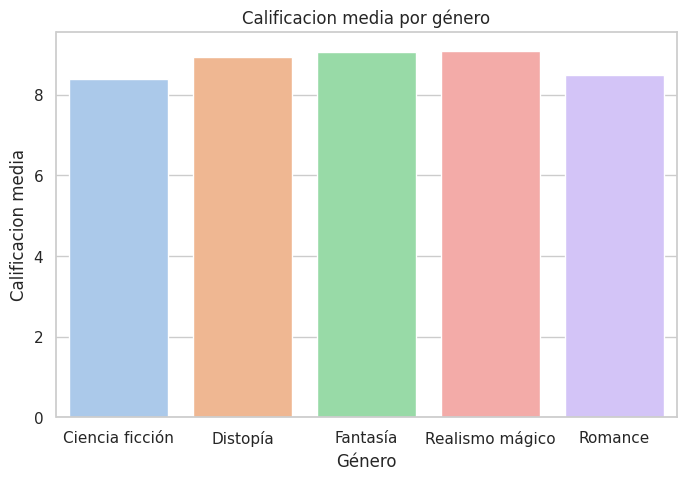

In [30]:
# Barras de calificacion media por género

# La calificacion media por genero se calcula con:
calificacion_media_genero = df.groupby("genero")["calificacion"].mean().reset_index()
#reset_index() lo hacemos para convertir el resultado en un DataFrame estándar, más fácil de graficar.

#Ahora graficamos:
plt.figure(figsize=(8, 5))
sns.barplot(data=calificacion_media_genero, x="genero", y= "calificacion", palette="pastel")
plt.title("Calificacion media por género")
plt.xlabel("Género")
plt.ylabel("Calificacion media")
plt.show()

## Explicación:
### sns.barplot() hace barras, la altura es la media de la columna "calificacion".

### palette define colores suaves y agradables.

### Ajustamos títulos y etiquetas para que sea fácil entenderlo.

## Número de libros disponibles por género (o por cualquier grupo que quieras)
### Aquí necesitamos contar libros disponibles. Si tienes columna disponible con booleanos, podemos filtrar y contar:

/tmp/ipython-input-31-2620073479.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=conteo_disponible, x="genero", y= "cantidad", palette="muted")


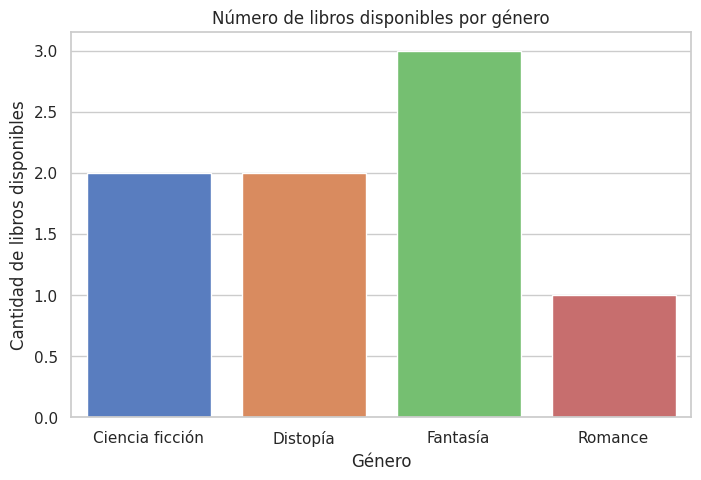

In [31]:
disponible = df[df["disponible"] == True]
conteo_disponible = disponible.groupby("genero").size().reset_index(name="cantidad")

plt.figure(figsize=(8, 5))
sns.barplot(data=conteo_disponible, x="genero", y= "cantidad", palette="muted")
plt.title("Número de libros disponibles por género")
plt.xlabel("Género")
plt.ylabel("Cantidad de libros disponibles")
plt.show()

#### Comparación del numero de paginas medio por género
Si quieres comparar otro atributo, por ejemplo numeros_paginas:

/tmp/ipython-input-32-3913249341.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=numero_paginas_medio,  x= "genero", y="paginas", palette="deep")


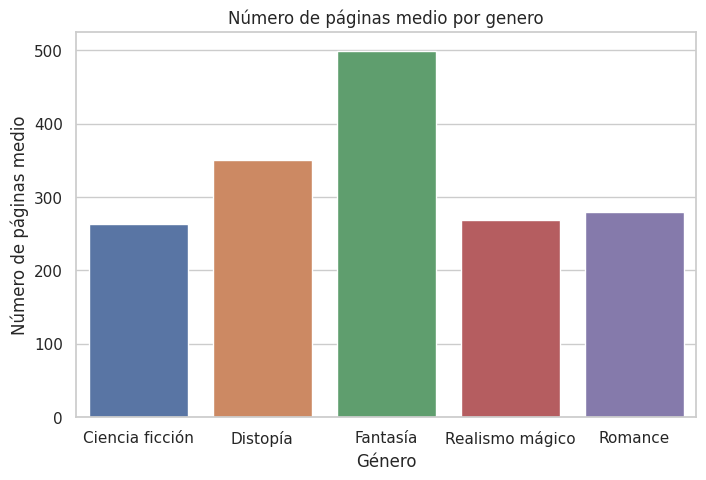

In [32]:
numero_paginas_medio = df.groupby("genero")["paginas"].mean().reset_index()

plt.figure(figsize=(8, 5))
sns.barplot(data=numero_paginas_medio,  x= "genero", y="paginas", palette="deep")
plt.title("Número de páginas medio por genero")
plt.xlabel("Género")
plt.ylabel("Número de páginas medio")
plt.show()

### Bonus: Mejorando la estética y agregando etiquetas numéricas

/tmp/ipython-input-33-653977341.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax=sns.barplot(data=calificacion_media_genero, x="genero", y="calificacion", palette="pastel")


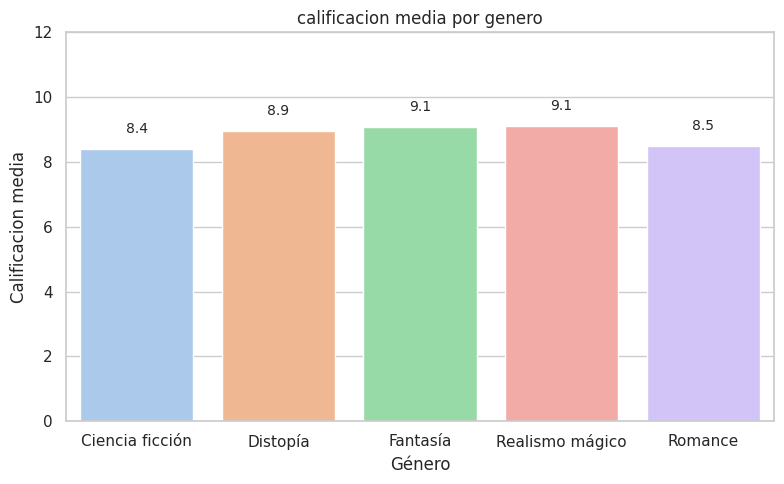

In [33]:
# Podemos agregar el valor encima de cada barra con mayor claridad
plt.figure(figsize=(8,5))
ax=sns.barplot(data=calificacion_media_genero, x="genero", y="calificacion", palette="pastel")
ax.set_ylim(0, 12)
plt.title("calificacion media por genero")
plt.xlabel("Género")
plt.ylabel("Calificacion media")

# Agregar etiquetas encima de cada barra

for p in ax.patches:
  altura = p.get_height()
  ax.text(p.get_x() + p.get_width()/2, altura + 0.5, f'{altura:.1f}', ha='center', fontsize=10)
plt.tight_layout()  # asegura que todo quepa bien
plt.show()